**Install & Import Libraries**

In [7]:
!pip install seaborn scikit-learn joblib plotly


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

import joblib
import warnings
warnings.filterwarnings("ignore")


**Uploading the dataset**

In [9]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])
df.head()


Saving Rainfall.csv to Rainfall (1).csv


,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


**CLEAN COLUMN NAMES**

In [10]:
df.columns = df.columns.str.strip()
df.columns


Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

**Check Data**

In [11]:
print("Shape:", df.shape)
df.info()
df.describe()


Shape: (366, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


**Handle Missing Values**

In [12]:
for col in df.columns:
    if df[col].dtype != "object":
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])


**Encode Target Column**

**Drop Irrelevant Columns**

**Exploratory Data Analysis**

In [13]:
df['rainfall'] = df['rainfall'].map({'yes':1, 'no':0})


In [14]:
df = df.drop(columns=['day'])


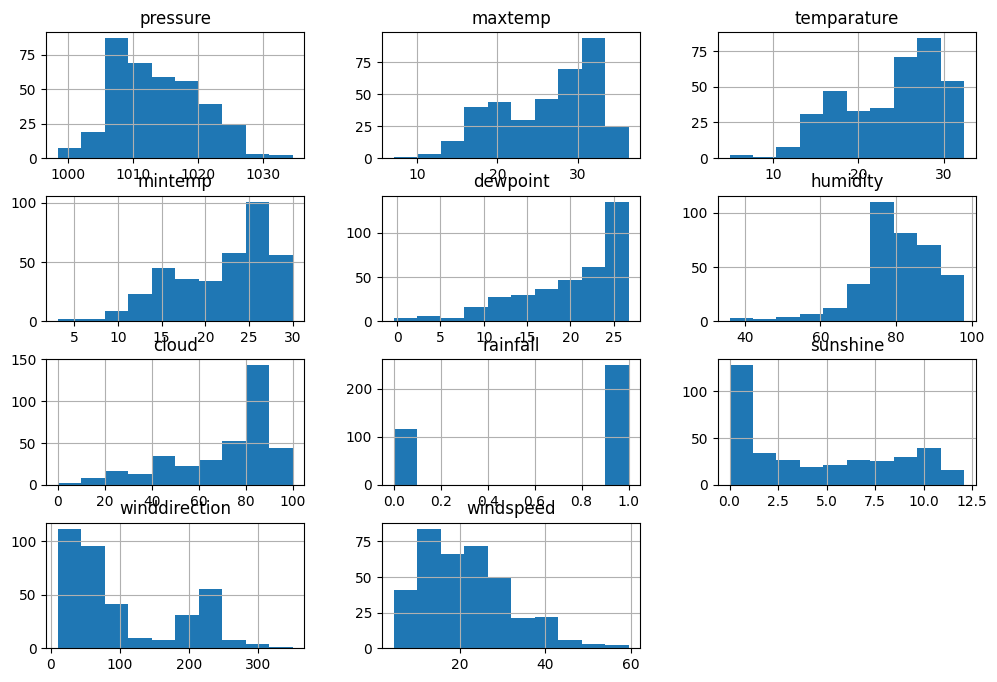

In [15]:
df.hist(figsize=(12,8))
plt.show()


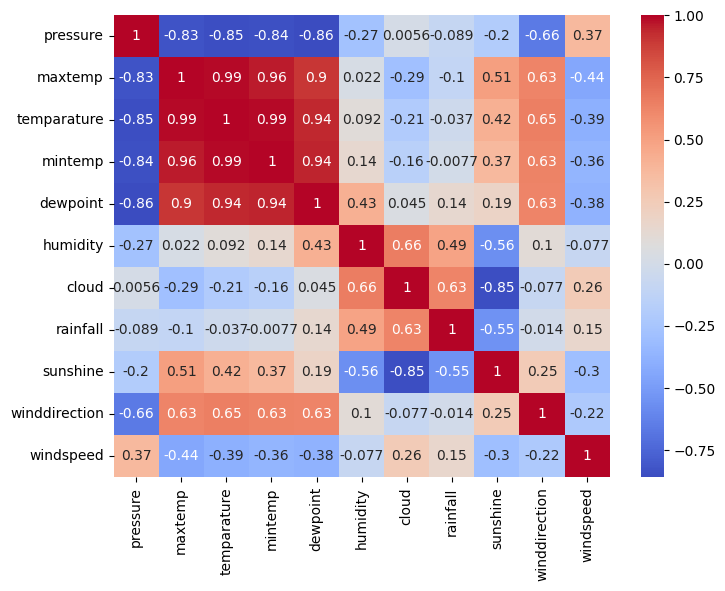

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


**SPLIT DATA**

In [17]:
X = df.drop('rainfall', axis=1)
y = df['rainfall']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)


**TRAIN RANDOM FOREST**

In [18]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.8108108108108109

**HYPERPARAMETER TUNING**

In [19]:
params = {
    'n_estimators':[100,200,300,500],
    'max_depth':[5,10,15,20,None],
    'min_samples_leaf':[1,2,4],
    'min_samples_split':[2,5,10]
}

rf2 = RandomForestClassifier(random_state=42)

rs = RandomizedSearchCV(
    rf2,
    params,
    cv=5,
    scoring='accuracy',
    n_iter=20,
    verbose=2
)

rs.fit(X_train, y_train)

best_model = rs.best_estimator_
best_model


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples

RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=300,
                       random_state=42)

**FINAL EVALUATION**

In [20]:
y_pred = best_model.predict(X_test)
print("Final Accuracy:", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))


Final Accuracy: 0.8378378378378378
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        24
           1       0.83      0.96      0.89        50

    accuracy                           0.84        74
   macro avg       0.85      0.77      0.79        74
weighted avg       0.84      0.84      0.83        74



**Confusion Matrix**

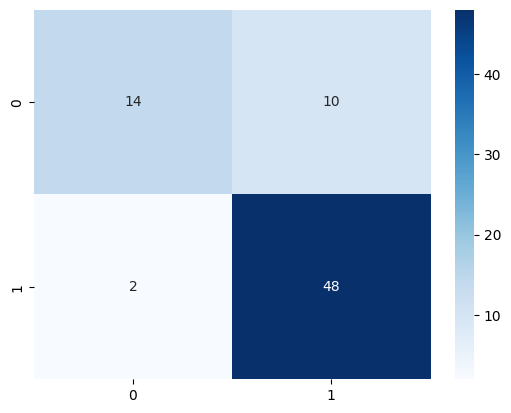

In [21]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()


**FEATURE IMPORTANCE**

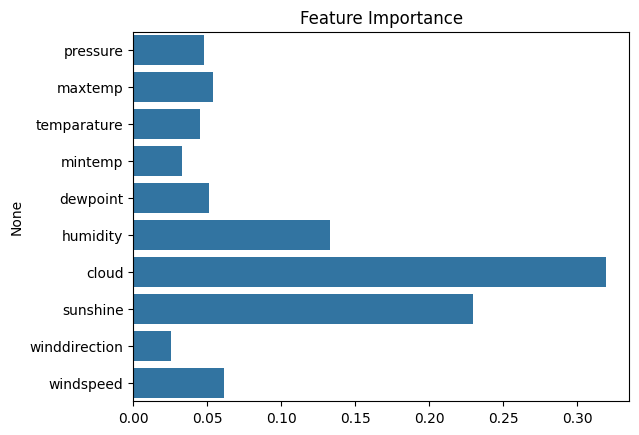

In [23]:
sns.barplot(x=best_model.feature_importances_, y=X.columns)
plt.title("Feature Importance")
plt.show()


**PREDICTION FUNCTION**

In [24]:
def predict_rain(values):
    arr = np.array(values).reshape(1, -1)
    prob = best_model.predict_proba(arr)[0][1]
    prediction = "Rain" if prob > 0.5 else "No Rain"
    return prediction, round(prob*100, 2)


**User Input Prediction Function**

In [33]:
# Extract actual feature names from X
feature_names = list(X.columns)
print("Model will expect features in this order:\n", feature_names)

def user_input_predict():
    print("\nEnter the following values:\n")

    values = []
    for feature in feature_names:
        val = float(input(f"Enter {feature}: "))
        values.append(val)

    arr = np.array(values).reshape(1, -1)
    prob = best_model.predict_proba(arr)[0][1]

    prediction = "Rain" if prob > 0.5 else "No Rain"

    print("🌧 Rainfall Prediction Result")
    print(f"Prediction : {prediction}")

    return prediction, confidence


Model will expect features in this order:
 ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']


**Run Prediction**

In [32]:
user_input_predict()



Enter the following values:

Enter pressure: 1000
Enter maxtemp: 40
Enter temparature: 55
Enter mintemp: 23
Enter dewpoint: 55
Enter humidity: 66
Enter cloud: 44
Enter sunshine: 33
Enter winddirection: 23
Enter windspeed: 23

🌧 Rainfall Prediction Result
Prediction : No Rain
Confidence : 42.23%


('No Rain', np.float64(42.23))